# Downside Risk and Sortino Ratio

> __Downside risk, Sortino Ratio, and Sharpe Ratio__ are all measures used in finance to assess the risk and return characteristics of an investment, but they focus on different aspects of risk and have distinct calculations.

__`Downside Risk`:__
- __Definition__: Downside risk measures the potential loss or deviation below a certain threshold or target return level.

- __Calculation__: It is often quantified as the standard deviation of returns below a specified threshold (usually the risk-free rate or a minimum acceptable return).

- __Interpretation__: A lower downside risk indicates less volatility in negative returns, suggesting a more stable performance during unfavorable market conditions.

__`Sharpe Ratio`__
- __Definition__: The Sharpe Ratio is a measure of risk-adjusted return. It assesses the excess return of an investment (returns above the risk-free rate) per unit of total risk (volatility).
- $\frac{\text{Return - Risk free}}{std}$
- __Interpretation__: A higher Sharpe Ratio indicates a better risk-adjusted performance, as it suggests a higher return relative to the amount of risk taken.

__`Sortino Ratio`:__
- __Definition__: The Sortino Ratio is a modification of the Sharpe Ratio. It focuses on downside risk only, considering volatility of returns below a specified threshold.
- __Calculation__: Sortino Ratio is calculated as: $\frac{R_p - R_t}{std}$, where R_t is the target or threshold return.
- __Interpretation__: Similar to the Sharpe Ratio, a higher Sortino Ratio indicates better risk-adjusted performance, but it specifically considers the downside risk.
​

> __Problem about shrap ratio__: the sharp ratio penalizes not only downside but also upside volatility

---

# Getting Ready

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
returns = pd.read_csv("../Data/returns.csv", index_col = "Date", parse_dates = ["Date"])
returns.head(50)

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.000000,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.000000,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.000000,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.000000,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.000000,0.005446,0
2010-01-07,0.005733,-0.005733,-0.013236,0.000000,0.005733,0
2010-01-08,-0.000087,0.000087,0.000201,0.000000,0.000000,0
2010-01-09,0.003004,-0.003004,-0.006922,0.000000,0.003004,0
2010-01-10,0.002796,-0.002796,-0.006443,0.002796,-0.000000,0


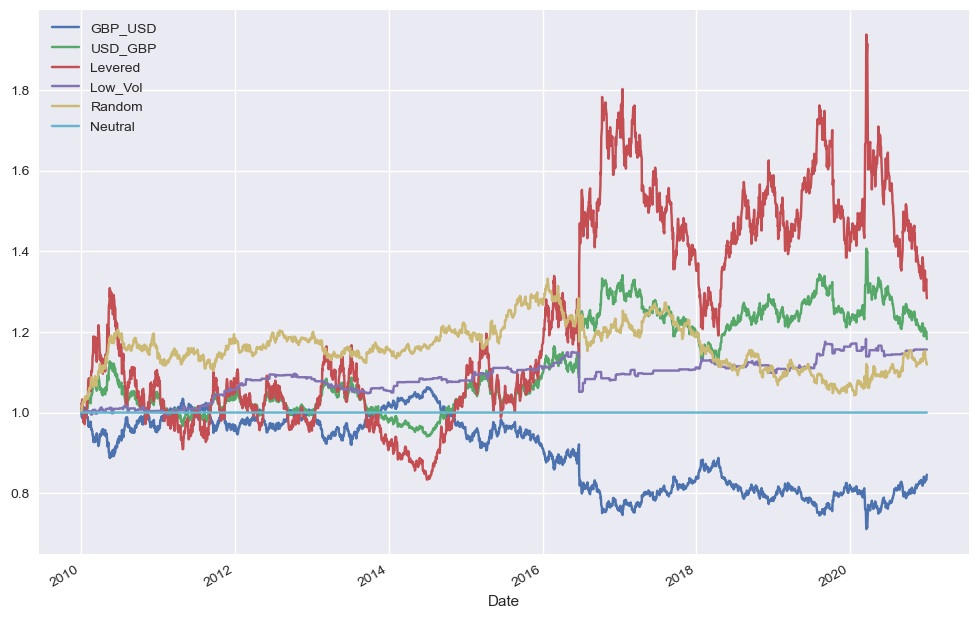

In [3]:
# Visualize the cumelative return of each instrument
returns.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

In [4]:
td_year = (returns.count() / ((returns.index[-1] - returns.index[0]).days / 365.25)).iloc[0]
td_year

285.5590909090909

---

# Downside Deviation (Semi-Deviation)

__`Downside Risk`:__
- __Definition__: Downside risk measures the potential loss or deviation below a certain threshold or target return level.

- __Calculation__: It is often quantified as the standard deviation of returns below a specified threshold (usually the risk-free rate or a minimum acceptable return).

- __Interpretation__: A lower downside risk indicates less volatility in negative returns, suggesting a more stable performance during unfavorable market conditions.

In [5]:
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


In [6]:
# Take this instrument as an example
symbol = "USD_GBP"

In [7]:
# define target minimum return
TMR = 0 

In [8]:
# excess returns over TMR
excess_returns = returns[symbol] - TMR
excess_returns

Date
2010-01-02    0.002733
2010-01-03    0.001727
2010-01-04    0.005786
2010-01-05   -0.001687
2010-01-06    0.005446
                ...   
2020-12-23   -0.005004
2020-12-27    0.008278
2020-12-28   -0.003799
2020-12-29   -0.009054
2020-12-30   -0.003012
Name: USD_GBP, Length: 3139, dtype: float64

In [9]:
# setting postive excess returns to zero!.
# where return bigger than 0, set it to zero 
excess_returns = np.where(excess_returns < 0, excess_returns, 0)
excess_returns

array([ 0.        ,  0.        ,  0.        , ..., -0.00379932,
       -0.00905404, -0.00301208])

In [13]:
# Now, we take the down side deviation
# excess_returns - its all the negative return only. 

downside_deviation = np.sqrt(np.mean(excess_returns**2)) 

print(f"This is the down side risk of the instrument: {downside_deviation}")
# Its based on daily data, so this is the daily dowm-side deviation. 

This is the down side risk of the instrument: 0.0036313265134239915


---

# Sortino Ratio

__`Sortino Ratio`:__
- __Definition__: The Sortino Ratio is a modification of the Sharpe Ratio. It focuses on downside risk only, considering volatility of returns below a specified threshold.
- __Calculation__: Sortino Ratio is calculated as: $\frac{R_p - R_t}{std}$, where R_t is the target or threshold return.
- __Interpretation__: Similar to the Sharpe Ratio, a higher Sortino Ratio indicates better risk-adjusted performance, but it specifically considers the downside risk.
​

In [14]:
downside_deviation

0.0036313265134239915

In [15]:
# Compute the mean of the daily return
mean = returns[symbol].mean() 
mean

5.333811413562378e-05

In [22]:
# compute the sortio ratio:
# (mean return - target mean return) / downside_deviation * years trading days
# np.sqrt(td_year) its for annualize the sartino ratio
sortino = (mean - TMR) / downside_deviation * np.sqrt(td_year)
sortino

# we can compute the dayly sertinio ratio:
# sortino = (mean - TMR) / downside_deviation

0.24821061528136432

---

# Putting everything toghether

In [17]:
import pandas as pd
import numpy as np

In [18]:
returns = pd.read_csv("../Data/returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


In [19]:
# A function that calculate the annualize sortino ratio:

def sortino(series, TMR = 0):
    
    # Compute the excess return
    excess_returns = (series - TMR)
    # take the down-side deviation 
    downside_deviation = np.sqrt(np.mean(np.where(excess_returns < 0, excess_returns, 0)**2))
    
    if downside_deviation == 0:
        return np.nan
    else:
        # Compute the sortino
        sortino = (series.mean() - TMR) / downside_deviation * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))
        return sortino

In [20]:
returns.apply(sortino).sort_values(ascending = False)

# Also here, the `Low_Vol` show the best sortino ratio. 
# its mean that the `Low_Vol` have the optimal ratio between the return and
# the down side risk! 

# here no surprise that the best risk adjusted return 
# has the low volatility strategy followed by `Low_Vol`

Low_Vol    0.396547
USD_GBP    0.248211
Random     0.182185
Levered    0.159784
GBP_USD   -0.225971
Neutral         NaN
dtype: float64

In [21]:
sortino(series = returns.USD_GBP, TMR = 0)

0.24821061528136432

> __the sartinio ratio and the down-side deviation are importent where the risk is critical issue, and its in the first order of importance.__